In [41]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [18]:
df=pd.read_csv('archive/US_Accidents_March23.csv')

In [13]:
df.shape

(7728394, 46)

In [14]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [15]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

We are going to examine road conditions, weather, state, time of the day. Therefore, we can drop columns not relevant to the analysis right now.


In [20]:
df=df.drop(columns=['ID', 'Source','Start_Lat','Start_Lng', 'End_Lat', 'End_Lng','Street','County','City', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp','Pressure(in)','Wind_Direction',
       'Wind_Speed(mph)','Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight','Description'])

In [22]:
missing = df.isna().sum()

In [23]:
missing

Severity                   0
Start_Time                 0
End_Time                   0
Distance(mi)               0
State                      0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Visibility(mi)        177098
Precipitation(in)    2203586
dtype: int64

For these missing values, we can insert the median of the present values into them.

In [25]:
df.describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.551296e+06,5.524808e+06
mean,2.212384e+00,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,9.090376e+00,8.407210e-03
std,4.875313e-01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,2.688316e+00,1.102246e-01
min,1.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,1.000000e+01,0.000000e+00
75%,2.000000e+00,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,1.400000e+02,3.647000e+01


In [35]:
df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].median())
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

In [36]:
df.isna().sum()

Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Visibility(mi)       0
Precipitation(in)    0
dtype: int64

In [45]:
df.head()

,Severity,Start_Time,End_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Precipitation(in)
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,62.0,91.0,10.0,0.02
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,62.0,100.0,10.0,0.00
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,OH,36.0,33.3,100.0,10.0,0.00
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,OH,35.1,31.0,96.0,9.0,0.00
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,OH,36.0,33.3,89.0,6.0,0.00


In [48]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],errors='coerce')
df["Day"] = df["Start_Time"].dt.day_name()
df["Hour"] = df["Start_Time"].dt.hour

In [49]:
df.head()

,Severity,Start_Time,End_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Precipitation(in),Day,Hour
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,OH,36.9,62.0,91.0,10.0,0.02,Monday,5.0
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,OH,37.9,62.0,100.0,10.0,0.00,Monday,6.0
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,OH,36.0,33.3,100.0,10.0,0.00,Monday,6.0
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,OH,35.1,31.0,96.0,9.0,0.00,Monday,7.0
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,OH,36.0,33.3,89.0,6.0,0.00,Monday,7.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Severity           int64         
 1   Start_Time         datetime64[ns]
 2   End_Time           object        
 3   Distance(mi)       float64       
 4   State              object        
 5   Temperature(F)     float64       
 6   Wind_Chill(F)      float64       
 7   Humidity(%)        float64       
 8   Visibility(mi)     float64       
 9   Precipitation(in)  float64       
 10  Day                object        
 11  Hour               float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 707.6+ MB


<Axes: xlabel='count', ylabel='State'>

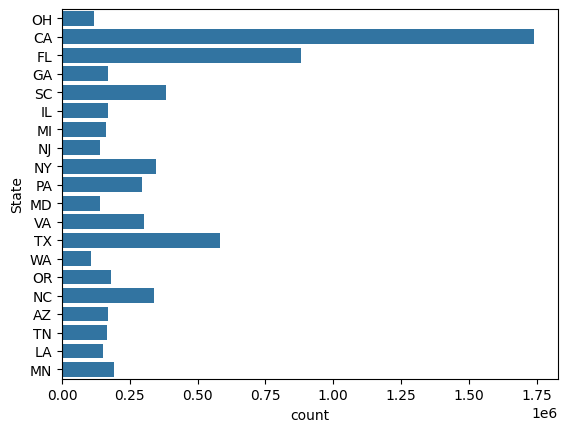

In [58]:
top_20_states=df['State'].value_counts().nlargest(20).index
sns.countplot(y='State',data=df[df['State'].isin(top_20_states)])

Calirfornia is the state with the most accidents

<Axes: xlabel='Day', ylabel='count'>

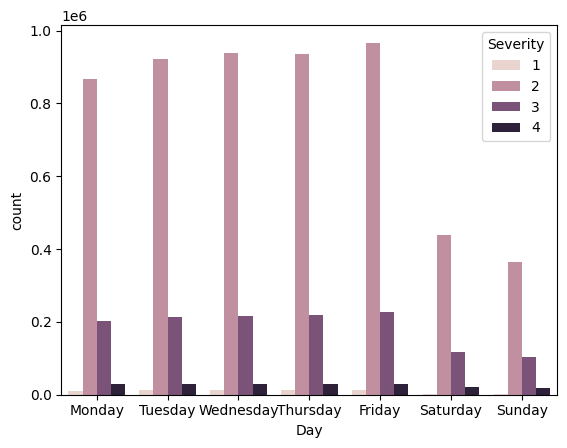

In [60]:
sns.countplot(x='Day',data=df,hue='Severity')

Weekdays seem to have a lot more accidents than weekends. Weekends have almost only half as many accidents as any other weekday. Most accidents are of severity category 2.

<Axes: xlabel='Start_Time', ylabel='Count'>

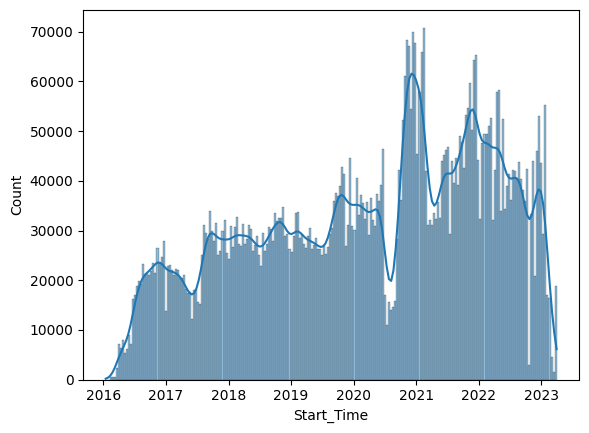

In [61]:
sns.histplot(df['Start_Time'],kde=True)

There is an accident peak in 2021 and 2022, overall the trend seems to be growing upwards

<Axes: xlabel='Temperature(F)', ylabel='Count'>

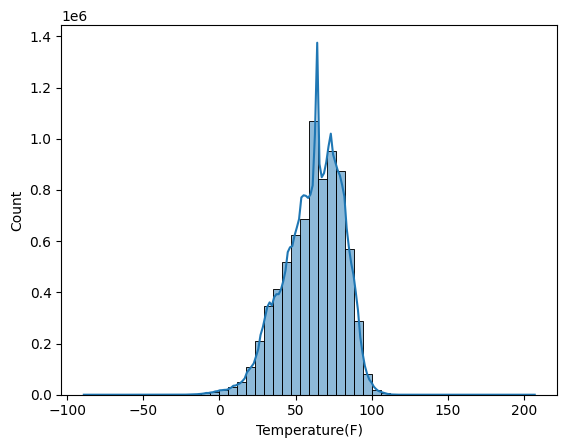

In [64]:
sns.histplot(df['Temperature(F)'],kde=True,bins=50)

This shows accidents seem to be more frequent in colder climates. Presence of snow and reduced visibility could be factors

<Axes: xlabel='Visibility(mi)', ylabel='Count'>

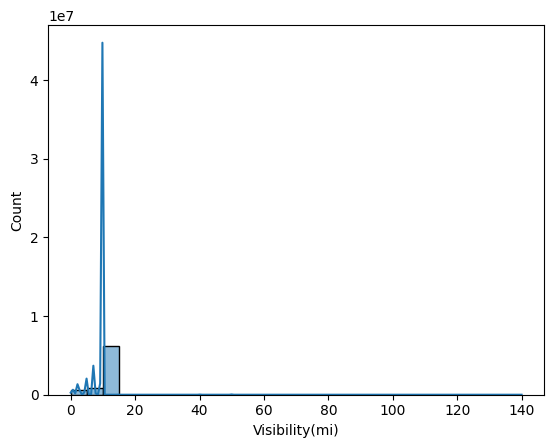

In [69]:
sns.histplot(df['Visibility(mi)'],kde=True,bins=[0,5,10,15,20])

As expected, most accidents occur in lower visaibility areas which could be caused by lower temperatures. Another factor could be skidding due to precipitation and snow.

In [85]:
sample=df.sample(100000)

In [86]:
sample

,Severity,Start_Time,End_Time,Distance(mi),State,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Precipitation(in),Day,Hour
6298171,2,2021-02-12 10:49:00,2021-02-15 12:44:19,0.339,FL,81.0,81.0,70.0,10.0,0.0,Friday,10.0
5024898,2,2022-04-27 19:22:39,2022-04-27 21:03:43,0.197,TN,66.0,66.0,30.0,10.0,0.0,Wednesday,19.0
4441072,2,2022-07-27 07:56:00,2022-07-27 08:29:30,0.318,FL,85.0,85.0,72.0,10.0,0.0,Wednesday,7.0
5171886,2,NaT,2022-04-13 19:22:37.000000000,0.089,FL,82.0,82.0,54.0,10.0,0.0,NaN,NaN
5803125,2,2021-12-17 12:19:00,2021-12-17 12:57:30,0.172,TX,75.0,75.0,66.0,10.0,0.0,Friday,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1352947,2,2020-10-29 17:47:25,2020-10-29 18:16:48,0.000,MI,48.0,43.0,74.0,10.0,0.0,Thursday,17.0
1347432,2,2020-10-26 11:38:04,2020-10-26 12:20:42,0.000,PA,54.0,54.0,83.0,10.0,0.0,Monday,11.0
21185,2,2016-09-20 18:22:09,2016-09-20 18:51:59,0.000,CA,66.0,62.0,70.0,10.0,0.0,Tuesday,18.0
6247091,2,2021-12-23 10:47:00,2021-12-23 11:38:00,2.696,SC,48.0,45.0,40.0,10.0,0.0,Thursday,10.0


<Axes: xlabel='Distance(mi)', ylabel='Precipitation(in)'>

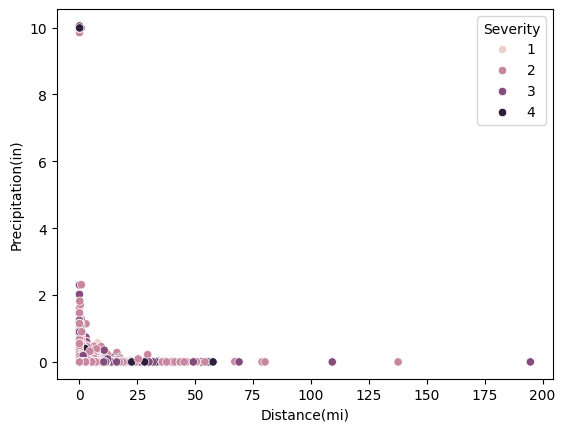

In [87]:
sns.scatterplot(x='Distance(mi)',y='Precipitation(in)',data=sample,hue='Severity')

<Axes: >

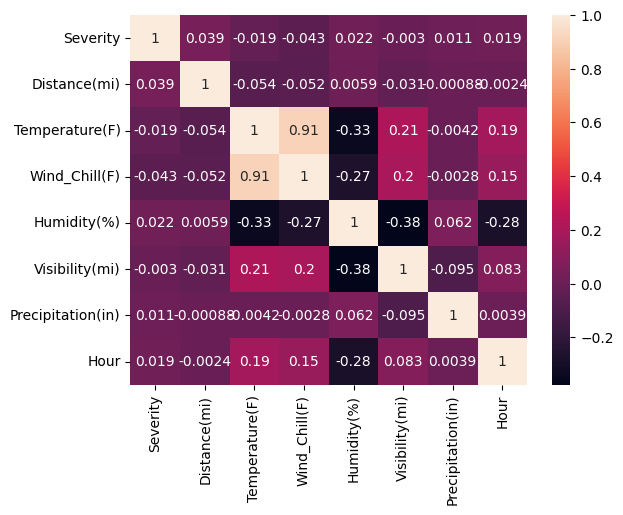

In [88]:
sns.heatmap(sample.corr(numeric_only=True), annot=True)

<Axes: xlabel='Hour', ylabel='Count'>

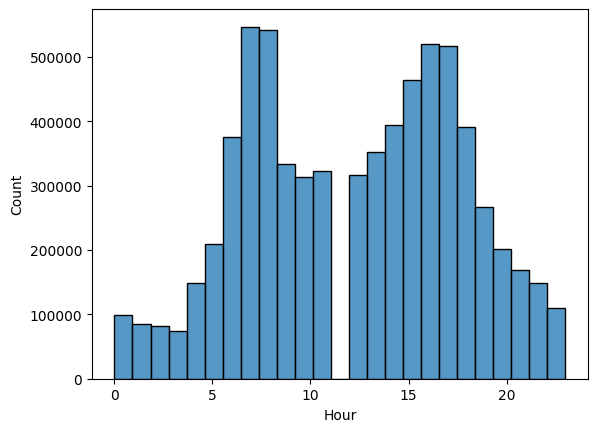

In [92]:
sns.histplot(df['Hour'],bins=25)

Most accidents are between 5am and 10am, and between 3pm and 6pm. 